In [1]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
path_interactions = 'starwars-full-interactions.json'
path_mentions = 'starwars-full-mentions.json'

In [3]:
with open(path_interactions) as f:
    data_interactions = json.load(f)

with open(path_mentions) as f:
    data_mentions = json.load(f)

In [4]:
G_interactions = nx.Graph()
G_mentions = nx.Graph()

In [5]:
# Вузли та зв'язки для мережі взаємодій
for node in data_interactions['nodes']:
    G_interactions.add_node(node['name'], value=node['value'], colour=node['colour'])

for link in data_interactions['links']:
    G_interactions.add_edge(data_interactions['nodes'][link['source']]['name'],
                            data_interactions['nodes'][link['target']]['name'],
                            weight=link['value'])

# Вузли та зв'язка для мережі згадувань
for node in data_mentions['nodes']:
    G_mentions.add_node(node['name'], value=node['value'], colour=node['colour'])

for link in data_mentions['links']:
    G_mentions.add_edge(data_mentions['nodes'][link['source']]['name'],
                        data_mentions['nodes'][link['target']]['name'],
                        weight=link['value'])

#### Аналіз вибраного набору даних

In [6]:
print('Data from the Interactions Network')
print('Number of nodes: ', G_interactions.number_of_nodes())
print('Number of links:', G_interactions.number_of_edges())

print('Data from the Mentions Network')
print('Number of nodes: ', G_mentions.number_of_nodes())
print('Number of links:', G_mentions.number_of_edges())

Data from the Interactions Network
Number of nodes:  110
Number of links: 398
Data from the Mentions Network
Number of nodes:  113
Number of links: 817


In [7]:
components = list(nx.connected_components(G_interactions))
largest_component = max(components, key=len)
print(f'Кількість компонент зв\'язності: {len(components)}')
print(f'Розмір найбільшої компоненти: {len(largest_component)}')

Кількість компонент зв'язності: 2
Розмір найбільшої компоненти: 109


In [8]:
# Міжцентровість
betweenness = nx.betweenness_centrality(G_interactions)
print(f'Міжцентровість (вузли з найбільшою міжцентровістю): {sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]}')

# Центральність по близькості
closeness = nx.closeness_centrality(G_interactions)
print(f'Центральність по близькості (вузли з найбільшою центральністю): {sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]}')

# Центральність по степеню
degree_centrality = nx.degree_centrality(G_interactions)
print(f'Центральність по степеню (вузли з найбільшою кількістю зв\'язків): {sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]}')

Міжцентровість (вузли з найбільшою міжцентровістю): [('OBI-WAN', 0.21289741830262351), ('C-3PO', 0.1926808487468285), ('HAN', 0.1812153961936558), ('ANAKIN', 0.1621708391273783), ('LUKE', 0.137821617635291)]
Центральність по близькості (вузли з найбільшою центральністю): [('OBI-WAN', 0.5515936820202403), ('C-3PO', 0.5487649964714185), ('ANAKIN', 0.5377345442810383), ('LUKE', 0.5144671841919549), ('HAN', 0.5047602561883331)]
Центральність по степеню (вузли з найбільшою кількістю зв'язків): [('ANAKIN', 0.3761467889908257), ('OBI-WAN', 0.3211009174311927), ('PADME', 0.30275229357798167), ('C-3PO', 0.30275229357798167), ('QUI-GON', 0.23853211009174313)]


In [9]:
if nx.is_connected(G_interactions):
    diameter = nx.diameter(G_interactions)
    print(f'Діаметр мережі: {diameter}')
else:
    print('Мережа не є зв\'язною, тому неможливо обчислити діаметр.')

if nx.is_connected(G_mentions):
    diameter = nx.diameter(G_mentions)
    print(f'Діаметр мережі: {diameter}')
else:
    print('Мережа не є зв\'язною, тому неможливо обчислити діаметр.')

Мережа не є зв'язною, тому неможливо обчислити діаметр.
Діаметр мережі: 5


#### Визначення степеня кожного вузла

In [10]:
interaction_degrees = dict(G_interactions.degree())
mention_degrees = dict(G_mentions.degree())

print("Degrees in Interactions Network:", interaction_degrees)
print("Degrees in Mentions Network:", mention_degrees)

Degrees in Interactions Network: {'QUI-GON': 26, 'NUTE GUNRAY': 16, 'PK-4': 2, 'TC-14': 5, 'OBI-WAN': 35, 'DOFINE': 3, 'RUNE': 4, 'TEY HOW': 3, 'EMPEROR': 22, 'CAPTAIN PANAKA': 9, 'SIO BIBBLE': 8, 'JAR JAR': 24, 'TARPALS': 1, 'BOSS NASS': 6, 'PADME': 33, 'RIC OLIE': 7, 'WATTO': 5, 'ANAKIN': 41, 'SEBULBA': 6, 'JIRA': 3, 'SHMI': 8, 'C-3PO': 33, 'DARTH MAUL': 4, 'KITSTER': 8, 'WALD': 5, 'FODE/BEED': 3, 'JABBA': 12, 'GREEDO': 4, 'VALORUM': 4, 'MACE WINDU': 13, 'KI-ADI-MUNDI': 9, 'YODA': 16, 'RABE': 5, 'BAIL ORGANA': 16, 'GENERAL CEEL': 4, 'BRAVO TWO': 3, 'BRAVO THREE': 3, 'CAPTAIN TYPHO': 5, 'SENATOR ASK AAK': 7, 'ORN FREE TAA': 3, 'SOLA': 4, 'JOBAL': 4, 'RUWEE': 4, 'TAUN WE': 4, 'LAMA SU': 2, 'BOBA FETT': 9, 'JANGO FETT': 4, 'OWEN': 6, 'BERU': 7, 'CLIEGG': 5, 'COUNT DOOKU': 10, 'SUN RIT': 6, 'POGGLE': 6, 'PLO KOON': 1, 'ODD BALL': 2, 'GENERAL GRIEVOUS': 3, 'FANG ZAR': 4, 'MON MOTHMA': 10, 'GIDDEAN DANU': 4, 'CLONE COMMANDER GREE': 1, 'CLONE COMMANDER CODY': 4, 'TION MEDON': 1, 'CAPTAIN AN

#### Побудова степеневого розподілу (діаграма)

In [11]:
interaction_degree_values = list(interaction_degrees.values())
interaction_degree_count = Counter(interaction_degree_values)

mention_degree_values = list(mention_degrees.values())
mention_degree_count = Counter(mention_degree_values)

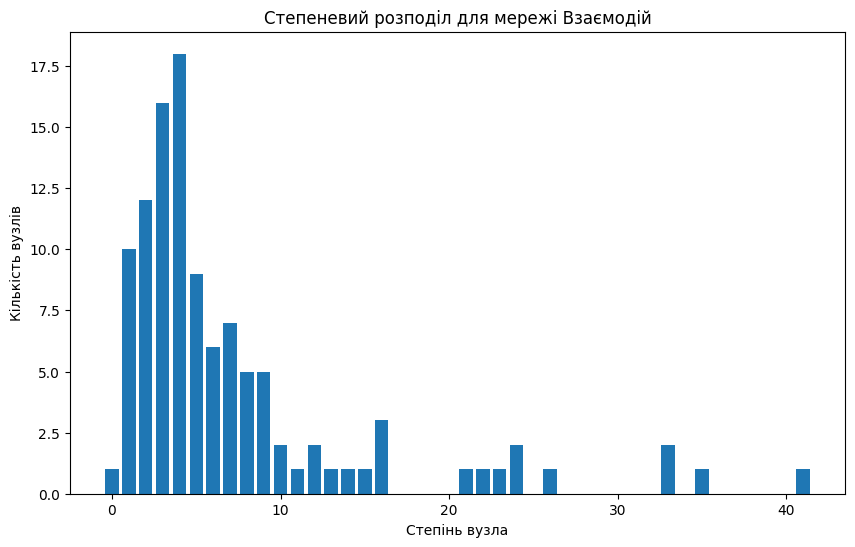

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(interaction_degree_count.keys(), interaction_degree_count.values())
plt.title("Степеневий розподіл для мережі Взаємодій")
plt.xlabel("Степінь вузла")
plt.ylabel("Кількість вузлів")
plt.show()

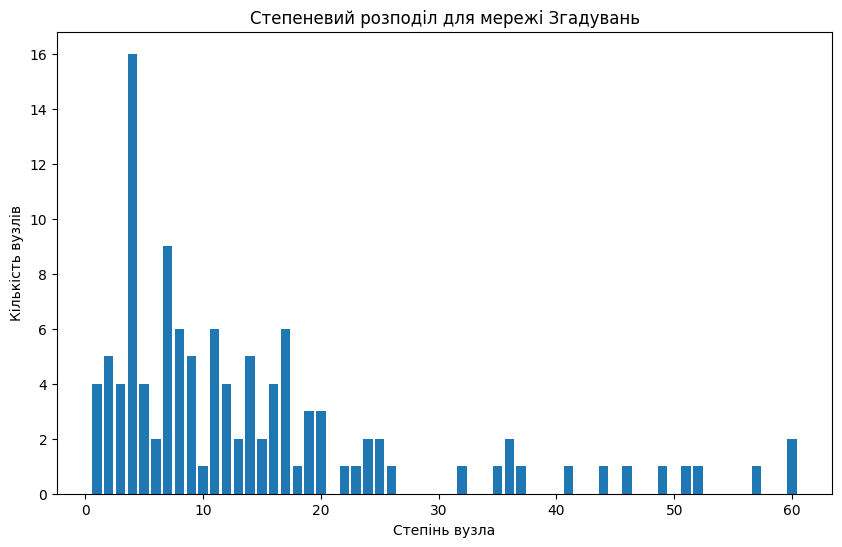

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(mention_degree_count.keys(), mention_degree_count.values())
plt.title("Степеневий розподіл для мережі Згадувань")
plt.xlabel("Степінь вузла")
plt.ylabel("Кількість вузлів")
plt.show()

#### Візуалізація мережі

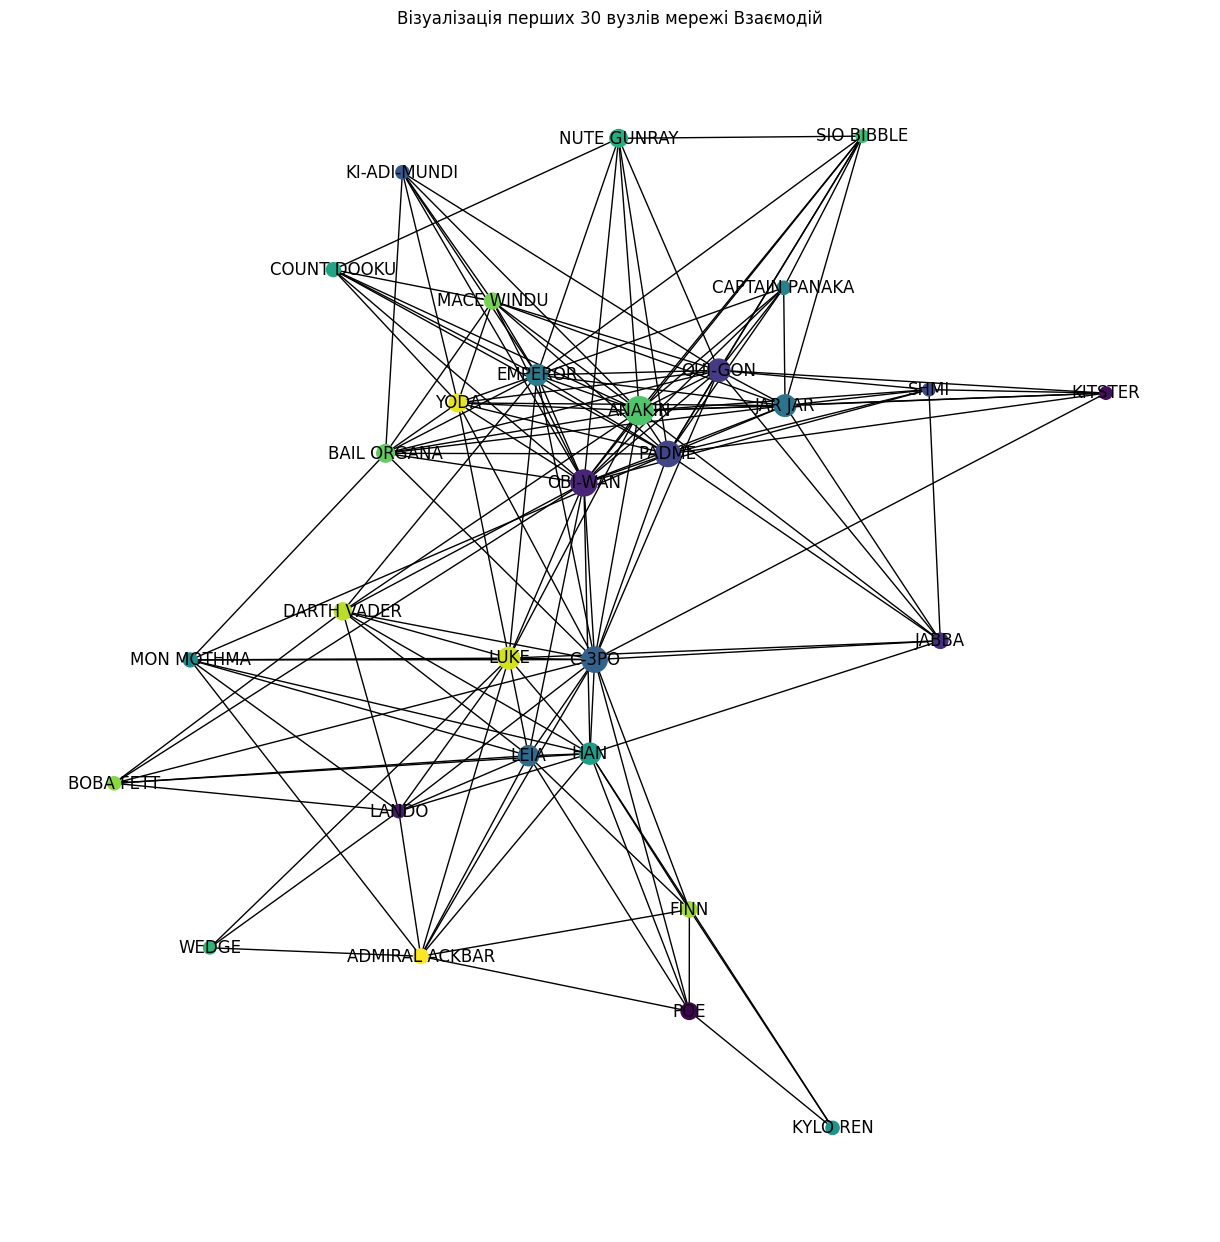

In [14]:
# Перші 30
top_30_interaction_nodes = sorted(interaction_degrees.items(), key=lambda x: x[1], reverse=True)[:30]
top_30_interaction_names = [node[0] for node in top_30_interaction_nodes]

G_interactions_sub = G_interactions.subgraph(top_30_interaction_names)

pos_interactions_sub = nx.spring_layout(G_interactions_sub)

colors_interactions = [plt.cm.viridis(i) for i in np.linspace(0, 1, len(G_interactions_sub.nodes()))]

plt.figure(figsize=(12, 12))
nx.draw(G_interactions_sub, pos_interactions_sub, with_labels=True,
        node_size=[interaction_degrees[node] * 10 for node in G_interactions_sub.nodes()],
        node_color=colors_interactions)  # Задаємо кольори
plt.title("Візуалізація перших 30 вузлів мережі Взаємодій")
plt.show()

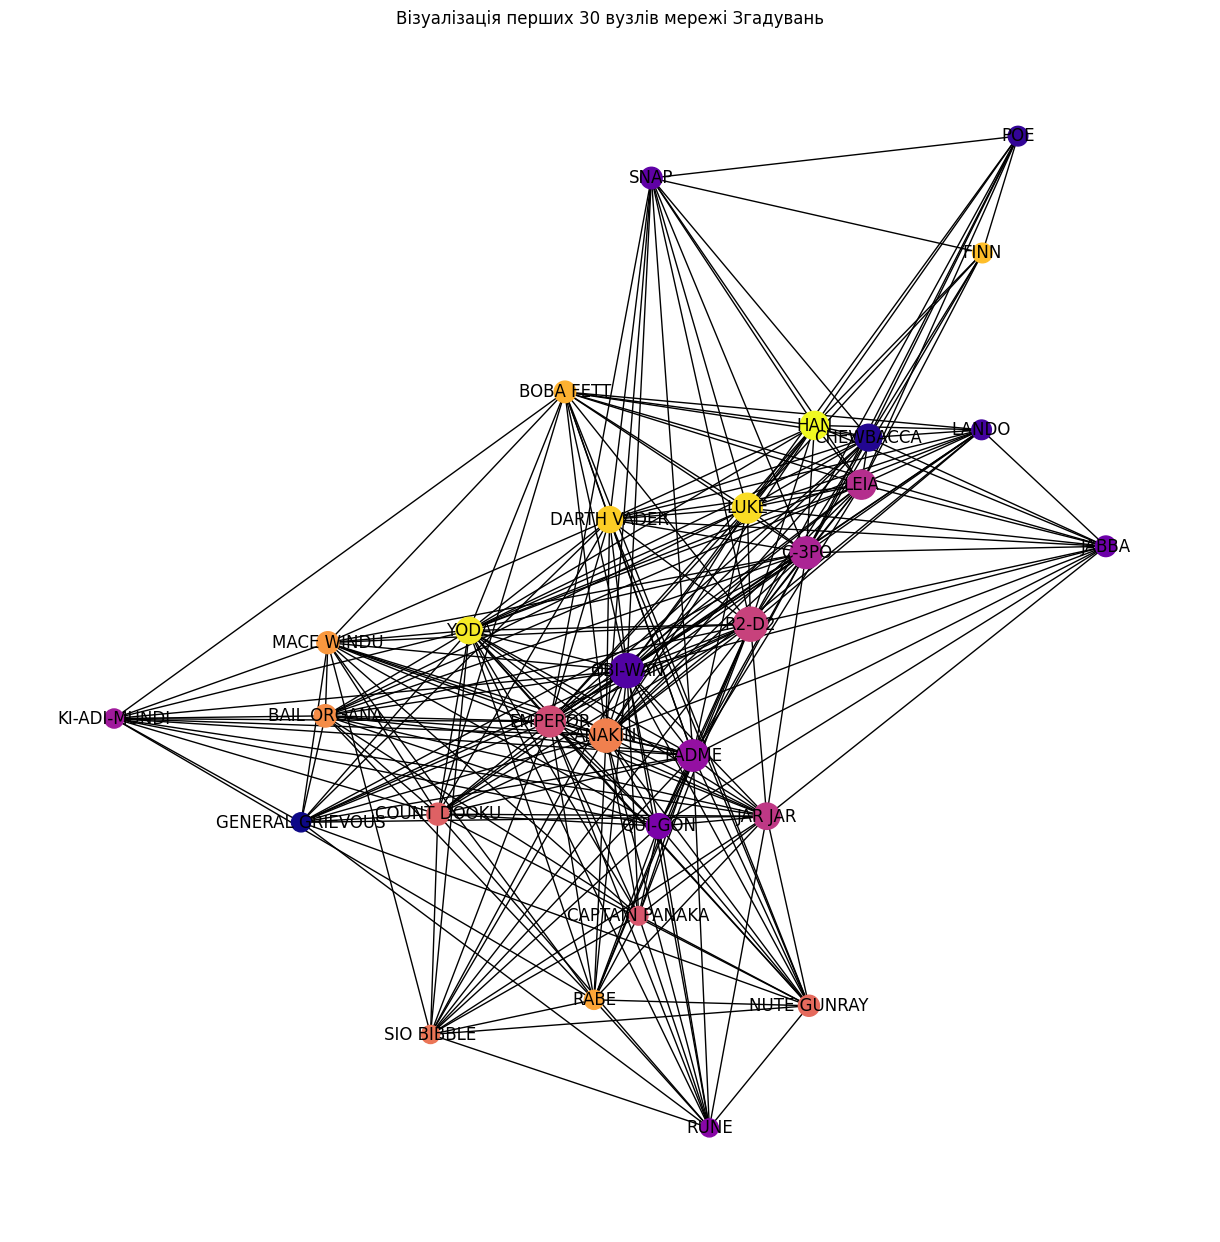

In [15]:
# Також перші 30
top_30_mention_nodes = sorted(mention_degrees.items(), key=lambda x: x[1], reverse=True)[:30]
top_30_mention_names = [node[0] for node in top_30_mention_nodes]

G_mentions_sub = G_mentions.subgraph(top_30_mention_names)

pos_mentions_sub = nx.spring_layout(G_mentions_sub)

colors_mentions = [plt.cm.plasma(i) for i in np.linspace(0, 1, len(G_mentions_sub.nodes()))]

plt.figure(figsize=(12, 12))
nx.draw(G_mentions_sub, pos_mentions_sub, with_labels=True,
        node_size=[mention_degrees[node] * 10 for node in G_mentions_sub.nodes()],
        node_color=colors_mentions)  # Задаємо кольори
plt.title("Візуалізація перших 30 вузлів мережі Згадувань")
plt.show()

#### Висновки про відповідність масштабно-інваріантним мережам

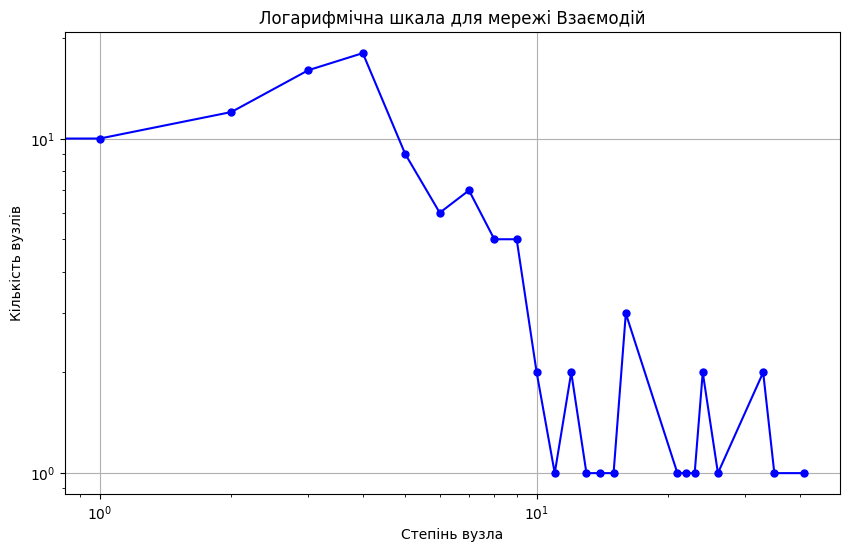

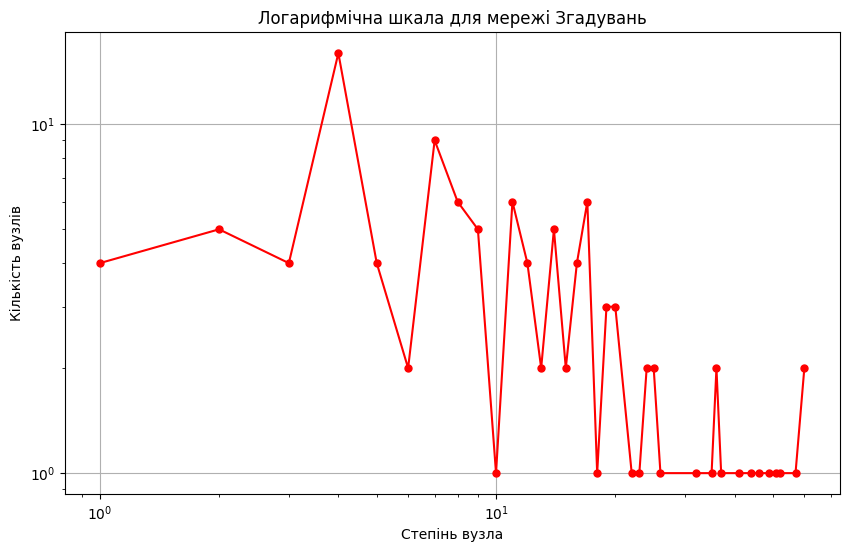

In [16]:
# Сортуємо дані для мережі Взаємодій
interaction_degrees_sorted = sorted(interaction_degree_count.items())
interaction_degree_keys = [key for key, value in interaction_degrees_sorted]
interaction_degree_values = [value for key, value in interaction_degrees_sorted]

plt.figure(figsize=(10, 6))
plt.loglog(interaction_degree_keys, interaction_degree_values, 
           marker='o', linestyle='-', color='b', markersize=5)  # З'єднуємо точки
plt.title("Логарифмічна шкала для мережі Взаємодій")
plt.xlabel("Степінь вузла")
plt.ylabel("Кількість вузлів")
plt.grid()
plt.show()

# Сортуємо дані для мережі Згадувань
mention_degrees_sorted = sorted(mention_degree_count.items())
mention_degree_keys = [key for key, value in mention_degrees_sorted]
mention_degree_values = [value for key, value in mention_degrees_sorted]

plt.figure(figsize=(10, 6))
plt.loglog(mention_degree_keys, mention_degree_values, 
           marker='o', linestyle='-', color='r', markersize=5)  # З'єднуємо точки
plt.title("Логарифмічна шкала для мережі Згадувань")
plt.xlabel("Степінь вузла")
plt.ylabel("Кількість вузлів")
plt.grid()
plt.show()


#### Визначення концентраторів

In [17]:
top_interaction_nodes = sorted(interaction_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print("Концентратори в мережі Взаємодій:", top_interaction_nodes)

top_mention_nodes = sorted(mention_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print("Концентратори в мережі Згадувань:", top_mention_nodes)

Концентратори в мережі Взаємодій: [('ANAKIN', 41), ('OBI-WAN', 35), ('PADME', 33), ('C-3PO', 33), ('QUI-GON', 26)]
Концентратори в мережі Згадувань: [('OBI-WAN', 60), ('R2-D2', 60), ('ANAKIN', 57), ('C-3PO', 52), ('PADME', 51)]
